In [1]:
import base_acquire as base
import wrangle 

from pprint import pprint
import pandas as pd
import nltk
import re

In [2]:
# read json file named data
data = pd.read_json("data.json")
data


,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/..."


In [3]:
# only use unique repos
data = data.drop_duplicates(subset="repo")
data

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/..."


In [4]:
data['clean_text'] = [wrangle.remove_url(readme) for readme in data.readme_contents]

In [55]:
wrangle.basic_clean(data.readme_contents)

AttributeError: 'DataFrame' object has no attribute 'readme_contents'

In [5]:
# view nulls
data.isnull().sum()

repo               0
language           0
readme_contents    0
clean_text         0
dtype: int64

Are there any words that uniquely identify a programming language?

In [6]:
# rename columns
data.rename(columns={'repo': 'repo_name', 'readme_contents': 'text', 'language': 'programming_lang'}, inplace=True)

In [7]:
data

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,Engines ======= Deprecation Note -------------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,# ZeroNet [![Build [简体中文](./README-zh-cn.md) [...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,# [![Freqtrade [![Coverage Freqtrade is a free...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...","<p id=""readme""><a width=""40%"" width=""50%"" alig..."
...,...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...,# Windows Package Manager Client This reposito...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...,**A friendly request: Thanks for visiting cont...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...,<!--- SPDX-License-Identifier: Apache-2.0 --> ...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/...","<a id=""top""></a> ![Catch2 logo](data/artwork/c..."


In [8]:
# Let's first take a look at how many of the texts are in what programming language.
data.programming_lang.value_counts()

JavaScript          24
Python              20
HTML                17
C++                 16
Jupyter Notebook    11
Java                 6
C                    5
Ruby                 3
TeX                  2
Shell                2
TypeScript           2
Go                   2
C#                   2
Assembly             1
Mathematica          1
CSS                  1
Swift                1
Kotlin               1
G-code               1
R                    1
PHP                  1
MATLAB               1
Matlab               1
Groff                1
Objective-C          1
Name: programming_lang, dtype: int64

In [9]:
# create new dataframe with the bottom 19 programming languages
data_19 = data[data.programming_lang.isin(data.programming_lang.value_counts().index[:19].tolist())]
data_19

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,Engines ======= Deprecation Note -------------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,# ZeroNet [![Build [简体中文](./README-zh-cn.md) [...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,# [![Freqtrade [![Coverage Freqtrade is a free...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...","<p id=""readme""><a width=""40%"" width=""50%"" alig..."
...,...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...,# Windows Package Manager Client This reposito...
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...,**A friendly request: Thanks for visiting cont...
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...,<!--- SPDX-License-Identifier: Apache-2.0 --> ...
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/...","<a id=""top""></a> ![Catch2 logo](data/artwork/c..."


In [10]:
labels = pd.concat([data.programming_lang.value_counts(),
                    data.programming_lang.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
JavaScript,24,0.193548
Python,20,0.161290
HTML,17,0.137097
C++,16,0.129032
Jupyter Notebook,11,0.088710
Java,6,0.048387
C,5,0.040323
Ruby,3,0.024194
TeX,2,0.016129
Shell,2,0.016129


Let's break the data up into seperate pieces:

- The words that appear in Javascript.

- The words that appear in Python.

- Words that appear in Jupyter Notebooks.

- Words that appear in C++.

- Words that appear in HTML.

- All other words.


In [11]:
import unicodedata

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [12]:
javascript_words = clean(' '.join(data[data.programming_lang == 'JavaScript'].clean_text))
python_words = clean(' '.join(data[data.programming_lang == 'Python'].clean_text))
jupyter_words = clean(' '.join(data[data.programming_lang == 'Jupyter Notebook'].clean_text))
# java_words = clean(' '.join(data[data.programming_lang == 'Java'].clean_text))
# c_words = clean(' '.join(data[data.programming_lang == 'C'].clean_text))
c_plus_words = clean(' '.join(data[data.programming_lang == 'C++'].clean_text))
html_words = clean(' '.join(data[data.programming_lang == 'HTML'].clean_text))

# rudy_words = clean(' '.join(data[data.programming_lang == 'Rudy'].clean_text))
# go_words = clean(' '.join(data[data.programming_lang == 'Go'].clean_text))
# type_words = clean(' '.join(data[data.programming_lang == 'TypeScript'].clean_text))
# tex_words = clean(' '.join(data[data.programming_lang == 'TeX'].clean_text))
# shell_words = clean(' '.join(data[data.programming_lang == 'Shell'].clean_text))

all_words = clean(' '.join(data.clean_text))
# other_words = clean(' '.join(data[data.programming_lang != 'JavaScript', 'Python', 'Jupyter Notebook', 'Java', 'C', 'C++', 'HTML'].clean_text))

In [113]:
javascript_words

['ccxt',
 'cryptocurrency',
 'exchange',
 'trading',
 'library',
 'build',
 'npm',
 'supported',
 'twitter',
 'javascript',
 'python',
 'php',
 'library',
 'cryptocurrency',
 'trading',
 'ecommerce',
 'support',
 'many',
 'bitcoinetheraltcoin',
 'exchange',
 'market',
 'merchant',
 'apis',
 'installinstall',
 'usageusage',
 'socialsocial',
 'ccxt',
 'ccxt',
 'library',
 'used',
 'connect',
 'trade',
 'cryptocurrency',
 'exchange',
 'payment',
 'processing',
 'service',
 'worldwide',
 'provides',
 'quick',
 'access',
 'market',
 'data',
 'storage',
 'analysis',
 'visualization',
 'indicator',
 'development',
 'algorithmic',
 'trading',
 'strategy',
 'backtesting',
 'bot',
 'programming',
 'related',
 'software',
 'engineering',
 'intended',
 'used',
 'coder',
 'developer',
 'technicallyskilled',
 'trader',
 'datascientists',
 'financial',
 'analyst',
 'building',
 'trading',
 'algorithm',
 'current',
 'feature',
 'list',
 'support',
 'many',
 'cryptocurrency',
 'exchange',
 'coming',
 '

In [13]:
javascript_freq = pd.Series(javascript_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
jupyter_freq = pd.Series(jupyter_words).value_counts()
# java_freq = pd.Series(java_words).value_counts()
# c_freq = pd.Series(c_words).value_counts()
c_plus_freq = pd.Series(c_plus_words).value_counts()
html_freq = pd.Series(html_words).value_counts()


# rudy_freq = pd.Series(rudy_words).value_counts()
# go_freq = pd.Series(go_words).value_counts()
# type_freq = pd.Series(type_words).value_counts()
# tex_freq = pd.Series(tex_words).value_counts()
# shell_freq = pd.Series(shell_words).value_counts()

all_freq = pd.Series(all_words).value_counts()
# other_freq = pd.Series(other_words).value_counts()

In [14]:
word_counts = (pd.concat([all_freq, javascript_freq, python_freq, jupyter_freq, c_plus_freq, html_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'jupyter', 'C_plus', 'html'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts

,all,javascript,python,jupyter,C_plus,html
0,46,7,5,1,8,0
00,2,1,0,0,0,0
0000,3,1,0,0,1,1
000030,3,0,0,3,0,0
000200,1,0,0,1,0,0
...,...,...,...,...,...,...
zubhub_backend,1,1,0,0,0,0
zubhubzubhub_frontendzubhub,1,1,0,0,0,0
zurich,3,0,0,0,0,0
zverovich,1,0,0,0,1,0


In [15]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,javascript,python,jupyter,C_plus,html
data,563,69,56,33,31,219
version,404,177,18,4,43,24
use,377,87,56,12,52,23
run,326,100,32,11,41,23
code,317,56,34,14,70,40
build,298,58,10,0,87,5
project,295,56,63,15,34,53
using,282,78,33,15,26,24
file,280,54,20,11,39,39
api,269,173,19,0,4,14


In [16]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='javascript').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.jupyter == 0].sort_values(by='jupyter').tail(6),
           word_counts[word_counts.C_plus == 0].sort_values(by='C_plus').tail(6),
           word_counts[word_counts.html == 0].sort_values(by='html').tail(6)])

,all,javascript,python,jupyter,C_plus,html
encrypteddecryptchacha20key,1,0,0,0,0,0
encrypteddata,1,0,0,0,0,0
encryptdecrypt,1,0,0,0,0,0
encourages,1,0,0,0,1,0
fitness,7,0,5,0,1,0
zxf,1,0,0,0,1,0
emblem,1,1,0,0,0,0
emerge,1,1,0,0,0,0
emergent,4,0,0,0,0,1
emerging,1,0,0,1,0,0


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
plt.rc('figure', figsize=(11, 5))
plt.style.use('fivethirtyeight')
plt.rc('font', size=16)

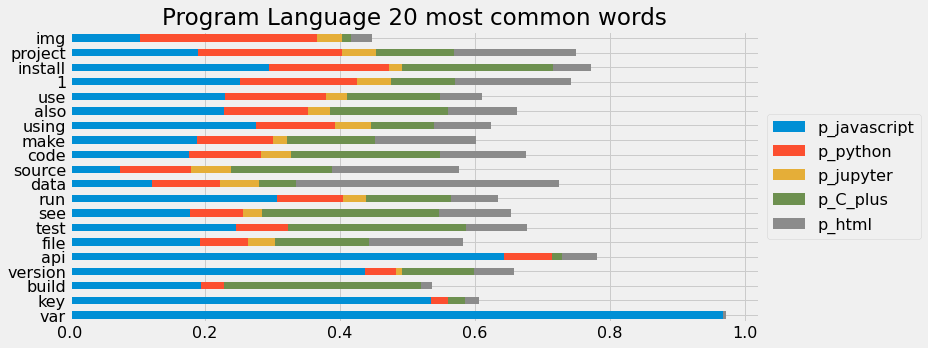

In [19]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_jupyter=word_counts.jupyter / word_counts['all'],
        #  p_java=word_counts.java / word_counts['all'],
        #  p_C=word_counts.C / word_counts['all'],
         p_C_plus=word_counts.C_plus / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
        #  p_rudy=word_counts.rudy / word_counts['all'],
        #  p_go=word_counts.go / word_counts['all'],
        #  p_type=word_counts.type / word_counts['all'],
        #  p_tex=word_counts.tex / word_counts['all'],
        #  p_shell=word_counts.shell / word_counts['all'])
 )

 
 .sort_values(by='all')
 [['p_javascript', 'p_python', 'p_jupyter', 'p_C_plus', 'p_html']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))


plt.title('Program Language 20 most common words')
# move legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# save the plot
plt.savefig('programming_language_20_most_common_words.png')

In [20]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,python,jupyter,C_plus,html
data,563,69,56,33,31,219
version,404,177,18,4,43,24
use,377,87,56,12,52,23
run,326,100,32,11,41,23
code,317,56,34,14,70,40
build,298,58,10,0,87,5
project,295,56,63,15,34,53
using,282,78,33,15,26,24
file,280,54,20,11,39,39
api,269,173,19,0,4,14


In [21]:
# Make Bigrams for javascript

# select all rows with javascript as programming language
data_js = data[data.programming_lang == 'JavaScript']


In [22]:
#remove index from data_js
data_js.reset_index(drop=True, inplace=True)

In [23]:
data_js_string = str(data_js.clean_text)

In [24]:
bigrams = nltk.ngrams(data_js_string.split(), 2)
list(bigrams)

[('0', '#'),
 ('#', 'CCXT'),
 ('CCXT', '–'),
 ('–', 'CryptoCurrency'),
 ('CryptoCurrency', 'eXchange'),
 ('eXchange', 'Trading'),
 ('Trading', 'Libra...'),
 ('Libra...', '1'),
 ('1', '#'),
 ('#', 'ZeroNet'),
 ('ZeroNet', '[![Build'),
 ('[![Build', '[简体中文](./README-zh-cn.md)'),
 ('[简体中文](./README-zh-cn.md)', '[...'),
 ('[...', '2'),
 ('2', '<p'),
 ('<p', 'id="readme"><a'),
 ('id="readme"><a', 'width="40%"'),
 ('width="40%"', 'width="50%"'),
 ('width="50%"', 'alig...'),
 ('alig...', '3'),
 ('3', '#'),
 ('#', 'crypto-js'),
 ('crypto-js', 'JavaScript'),
 ('JavaScript', 'library'),
 ('library', 'of'),
 ('of', 'crypto'),
 ('crypto', 'stand...'),
 ('stand...', '4'),
 ('4', 'sjcl'),
 ('sjcl', '===='),
 ('====', '[![Build'),
 ('[![Build', '[![Join'),
 ('[![Join', 'the'),
 ('the', 'chat'),
 ('chat', 'at'),
 ('at', 'Stanfor...'),
 ('Stanfor...', '5'),
 ('5', '#'),
 ('#', 'Forge'),
 ('Forge', '[![npm'),
 ('[![npm', '[![Build'),
 ('[![Build', 'A'),
 ('A', 'native'),
 ('native', 'implementatio...'),

In [25]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(javascript_words, 2))
                      .value_counts()
                      .head(20))

In [26]:
top_20_ham_bigrams.head()

(api, version)       131
(version, ccxt)       58
(ccxt, ccxt)          29
(__examples__, j)     28
(united, state)       25
dtype: int64

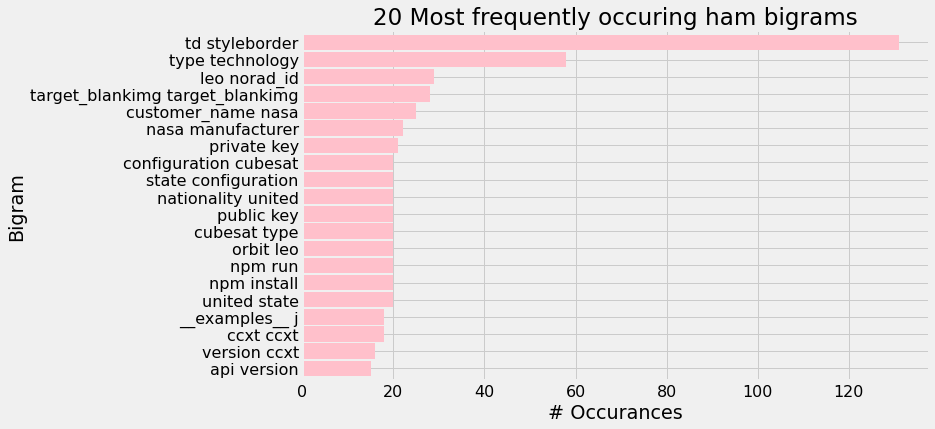

In [27]:
top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [28]:
def bigram_tool(lang, lang_words):
    top_20_ham_bigrams = (pd.Series(nltk.ngrams(lang_words, 2))
                      .value_counts()
                      .head(20))
    top_20_ham_bigrams.sort_values().plot.barh(color= 'red' , width=.9, figsize=(10, 6))


    plt.rc('figure', figsize=(11, 5))
    plt.style.use('fivethirtyeight')
    plt.rc('font', size=16)

    plt.title('20 Most frequently occuring ' + lang + ' bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    
    return top_20_ham_bigrams

,count
"(package, manager)",16
"(window, package)",15
"(git, clone)",14
"(pull, request)",13
"(source, code)",12
"(flight, software)",11
"(code, c)",10
"(open, source)",10
"(guest, science)",10
"(format, string)",9


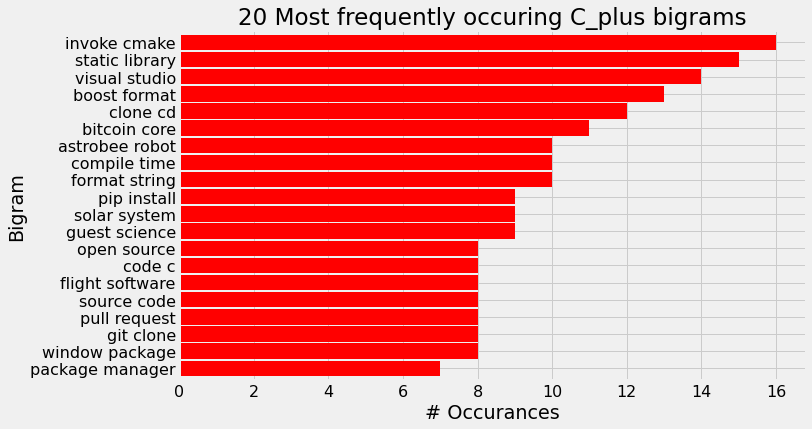

In [29]:


# what to run in function: 'all', all_words ; 'javascript', javascript_words ; 'python', python_words ; 'jupyter', jupyter_words ;	'C_plus', c_plus_words ; 'html', html_words

bigram = bigram_tool('C_plus', c_plus_words)
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

,count
"(api, version)",131
"(version, ccxt)",58
"(ccxt, ccxt)",29
"(__examples__, j)",28
"(united, state)",25
"(npm, install)",22
"(npm, run)",21
"(configuration, cubesat)",20
"(customer_name, nasa)",20
"(nasa, manufacturer)",20


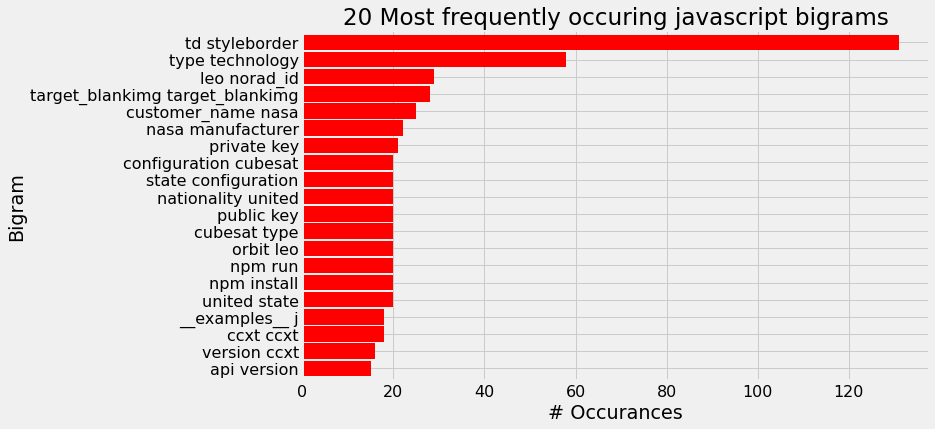

In [30]:

bigram = bigram_tool('javascript', javascript_words)
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

New questions:

What words can we use to identify the readme program language as Javascript and python.

In [31]:
# # add to repos HTML
# "web-sys1/ActionData",
# "rvaughan/coronavirus-data",
# "weareblahs/covidcases",
# "covid19-eu-zh/covid19-eu-data",
# "ercbk/Indiana-COVIDcast-Dashboard",
# "ercbk/Indiana-COVID-19-Website",
# "RamiKrispin/coronavirus",
# "covidatlas/coronadatascraper",
# "minvws/nl-covid19-notification-app-website",
# "BustByte/coronastatus",
# "tomwhite/covid-19-uk-data",
# "vinitshahdeo/Water-Monitoring-System",
# "labnol/covid19-vaccine-tracker"
## adding C++
# "google/googletest",
# "apache/incubator-doris",
# "fmtlib/fmt",
# "opencv/opencv",
# "microsoft/calculator",
# "microsoft/winget-cli",
# "IntelLabs/control-flag",
# "onnx/onnx",
# "catchorg/Catch2",
# "facebook/folly"

In [32]:
# how many nulls in the data?
data.isnull().sum()

repo_name           0
programming_lang    0
text                0
clean_text          0
dtype: int64

In [33]:
word_counts

,all,javascript,python,jupyter,C_plus,html
0,46,7,5,1,8,0
00,2,1,0,0,0,0
0000,3,1,0,0,1,1
000030,3,0,0,3,0,0
000200,1,0,0,1,0,0
...,...,...,...,...,...,...
zubhub_backend,1,1,0,0,0,0
zubhubzubhub_frontendzubhub,1,1,0,0,0,0
zurich,3,0,0,0,0,0
zverovich,1,0,0,0,1,0


In [34]:
# select onlt the rows with the programming language javascript, python, jupyter, c++, and html
data_js = data[data.programming_lang == 'JavaScript']
data_py = data[data.programming_lang == 'Python']
data_jy = data[data.programming_lang == 'Jupyter Notebook']
data_c_plus = data[data.programming_lang == 'C++']
data_html = data[data.programming_lang == 'HTML']
# combine the data frames
new_data = pd.concat([data_js, data_py, data_jy, data_c_plus, data_html])
new_data

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,# CCXT – CryptoCurrency eXchange Trading Libra...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,# ZeroNet [![Build [简体中文](./README-zh-cn.md) [...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...","<p id=""readme""><a width=""40%"" width=""50%"" alig..."
5,brix/crypto-js,JavaScript,# crypto-js\n\nJavaScript library of crypto st...,# crypto-js JavaScript library of crypto stand...
10,bitwiseshiftleft/sjcl,JavaScript,sjcl\n====\n\n[![Build Status](https://travis-...,sjcl ==== [![Build [![Join the chat at Stanfor...
...,...,...,...,...
109,minvws/nl-covid19-notification-app-website,HTML,Content & Translations\n---------------------\...,Content & Translations --------------------- #...
110,BustByte/coronastatus,HTML,# Coronastatus (archived)\n\n![](https://githu...,# Coronastatus (archived) > Report your health...
111,tomwhite/covid-19-uk-data,HTML,# COVID-19 UK Historical Data\n\n:warning: **U...,# COVID-19 UK Historical Data :warning: **Upda...
112,vinitshahdeo/Water-Monitoring-System,HTML,# [Water Monitoring System](https://vinitshahd...,# [Water Monitoring - IoT Project --- > ## :ma...


In [35]:
new_data['clean_text']

# convert the text into attribute to split
a = new_data['clean_text'][0]

In [36]:
# convert a into string
a = str(a)

a = str(new_data['clean_text'])

In [37]:
# # # get data ready to model
# # document = 'Mary had a little lamb, a little lamb, a little lamb.'

# # # clean up the text
# # document = document.lower().replace(',', '').replace('.', '')
# # transform into a series
# words = pd.Series(a.split())

# # From the Series we can extract the value_counts, which is our raw count
# # for term frequency. Once we have the raw counts, we can calculate the
# # other measures.
# (pd.DataFrame({'raw_count': words.value_counts()})
#  .assign(frequency=lambda df: df.raw_count / df.raw_count.sum())
#  .assign(augmented_frequency=lambda df: df.frequency / df.frequency.max()))

In [38]:
# select only programming language and clean text columns
new_data = data[['programming_lang', 'clean_text']]

In [39]:
new_data

,programming_lang,clean_text
0,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,C,Engines ======= Deprecation Note -------------...
2,JavaScript,# ZeroNet [![Build [简体中文](./README-zh-cn.md) [...
3,Python,# [![Freqtrade [![Coverage Freqtrade is a free...
4,JavaScript,"<p id=""readme""><a width=""40%"" width=""50%"" alig..."
...,...,...
119,C++,# Windows Package Manager Client This reposito...
120,C++,**A friendly request: Thanks for visiting cont...
121,C++,<!--- SPDX-License-Identifier: Apache-2.0 --> ...
122,C++,"<a id=""top""></a> ![Catch2 logo](data/artwork/c..."


In [40]:
# create a label column where javascript is 1 and python is 2 everything else is 0
data['label'] = data['programming_lang'].map({'JavaScript': 'javascript', 'Python': 'python', 'Jupyter Notebook': 'jupyter', 'C++': 'c_plus', 'HTML': 'html'})
# in the label column, replace the null values with 'other'
data['label'].fillna('other', inplace=True)

In [41]:
data

,repo_name,programming_lang,text,clean_text,label
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,# CCXT – CryptoCurrency eXchange Trading Libra...,javascript
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,Engines ======= Deprecation Note -------------...,other
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,# ZeroNet [![Build [简体中文](./README-zh-cn.md) [...,javascript
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,# [![Freqtrade [![Coverage Freqtrade is a free...,python
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...","<p id=""readme""><a width=""40%"" width=""50%"" alig...",javascript
...,...,...,...,...,...
119,microsoft/winget-cli,C++,# Windows Package Manager Client \n\nThis repo...,# Windows Package Manager Client This reposito...,c_plus
120,IntelLabs/control-flag,C++,**A friendly request: Thanks for visiting cont...,**A friendly request: Thanks for visiting cont...,c_plus
121,onnx/onnx,C++,<!--- SPDX-License-Identifier: Apache-2.0 -->\...,<!--- SPDX-License-Identifier: Apache-2.0 --> ...,c_plus
122,catchorg/Catch2,C++,"<a id=""top""></a>\n![Catch2 logo](data/artwork/...","<a id=""top""></a> ![Catch2 logo](data/artwork/c...",c_plus


In [42]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data into training and testing sets on programming language
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])
train_data

,repo_name,programming_lang,text,clean_text,label
86,shama/letswritecode,JavaScript,# Let's Write Code\n\nAll the code examples fo...,# Let's Write Code All the code examples for t...,javascript
28,NASAWorldWind/WorldWindJava,Java,"<img src=""https://worldwind.arc.nasa.gov/img/n...","<img height=""100""/> # WorldWind Java ## New ve...",other
62,INCF/neuroshapes,Python,[![Join the chat at https://gitter.im/INCF/neu...,[![Join the chat at [![Build ![GitHub # Welcom...,python
21,trustwallet/assets,Go,# Trust Wallet Assets Info\n\n![Check](https:/...,# Trust Wallet Assets Info ## Overview Trust W...,other
18,PrivateBin/PrivateBin,PHP,# [![PrivateBin](https://cdn.rawgit.com/Privat...,# *Current version: 1.4.0* **PrivateBin** is a...,other
...,...,...,...,...,...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...","<p id=""readme""><a width=""40%"" width=""50%"" alig...",javascript
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,# ZeroNet [![Build [简体中文](./README-zh-cn.md) [...,javascript
88,CTFd/CTFd,Python,# ![](https://github.com/CTFd/CTFd/blob/master...,# ![CTFd MySQL [![MajorLeagueCyber [![Document...,python
80,AgoraIO-Usecase/eEducation,Objective-C,# This repository has been deprecated and arch...,# This repository has been deprecated and arch...,other


In [43]:
# explore javascript data 
train_data_js = train_data[train_data.programming_lang == 'JavaScript']
train_data_js

,repo_name,programming_lang,text,clean_text,label
86,shama/letswritecode,JavaScript,# Let's Write Code\n\nAll the code examples fo...,# Let's Write Code All the code examples for t...,javascript
76,hyperledger-archives/education-cryptomoji,JavaScript,# Hyperledger Cryptomoji\n\nThis educational c...,# Hyperledger Cryptomoji This educational curr...,javascript
90,Akshima-Ghai/OneEducationalWebsiteForAll,JavaScript,"# OneEducationalWebsiteForAll\n\n<div align=""c...","# OneEducationalWebsiteForAll <div align=""cent...",javascript
97,arschles/go-in-5-minutes,JavaScript,# Go In 5 Minutes\n\n[![Build Status](https://...,# Go In 5 Minutes [![Build Welcome Gophers! Fi...,javascript
17,google/end-to-end,JavaScript,End-To-End\n==========\n\n![Travis Build](http...,"End-To-End ========== ![Travis ""End to End Tra...",javascript
14,digitalbazaar/forge,JavaScript,# Forge\n\n[![npm package](https://nodei.co/np...,# Forge [![npm [![Build A native implementatio...,javascript
25,NASAWorldWind/WebWorldWind,JavaScript,"<img src=""https://worldwind.arc.nasa.gov/img/n...","<img height=""100""/> # Web WorldWind ## New ver...",javascript
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,# CCXT – CryptoCurrency eXchange Trading Libra...,javascript
35,nasa/Open-Source-Catalog,JavaScript,# Open-Source-Catalog\n\n[![Build Status](http...,# Open-Source-Catalog [![Build ## About This G...,javascript
24,Haehnchen/crypto-trading-bot,JavaScript,# Crypto Trading Bot\n\n[![Build Status](https...,# Crypto Trading Bot [![Build A **work in prog...,javascript


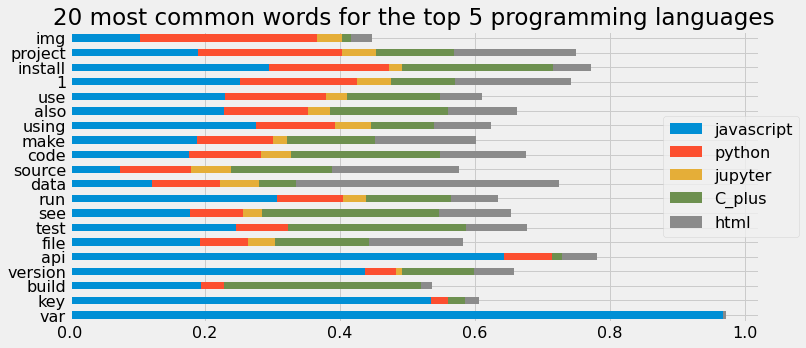

In [44]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(javascript=word_counts.javascript / word_counts['all'],
         python=word_counts.python / word_counts['all'],
         jupyter=word_counts.jupyter / word_counts['all'],
        #  p_java=word_counts.java / word_counts['all'],
        #  p_C=word_counts.C / word_counts['all'],
         C_plus=word_counts.C_plus / word_counts['all'],
         html=word_counts.html / word_counts['all'],
        #  p_rudy=word_counts.rudy / word_counts['all'],
        #  p_go=word_counts.go / word_counts['all'],
        #  p_type=word_counts.type / word_counts['all'],
        #  p_tex=word_counts.tex / word_counts['all'],
        #  p_shell=word_counts.shell / word_counts['all'])
 )

 
 .sort_values(by='all')
 [['javascript', 'python', 'jupyter', 'C_plus', 'html']]
 .tail(20)
 .sort_values('python')
 .plot.barh(stacked=True))


plt.title('20 most common words for the top 5 programming languages')
# move legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(.85, 0.5))
# save the plot
plt.savefig('programming_language_20_most_common_words.png')

,count
"(api, version)",131
"(open, source)",88
"(target_blankrua, img)",87
"(target_blankenga, target_blankrua)",76
"(version, ccxt)",58
"(git, clone)",47
"(npm, run)",45
"(pull, request)",40
"(source, code)",40
"(pip, install)",34


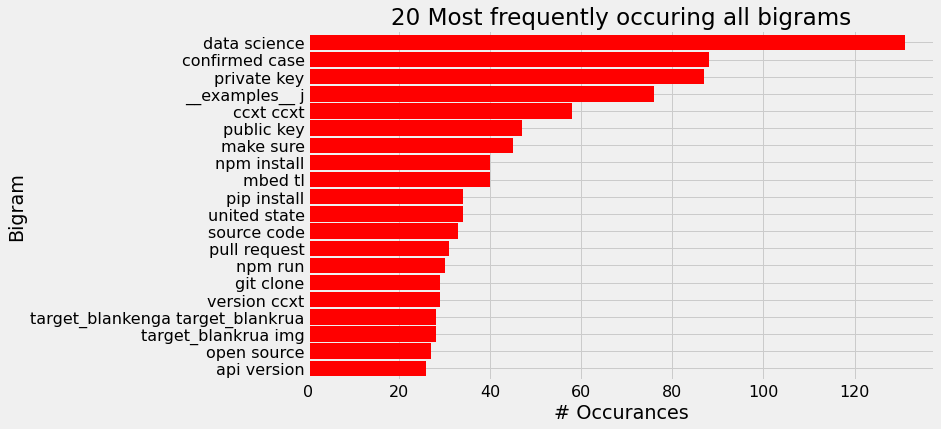

In [45]:
# what to run in function: 'all', all_words ; 'javascript', javascript_words ; 'python', python_words ; 'jupyter', jupyter_words ;	'C_plus', c_plus_words ; 'html', html_words

bigram = bigram_tool('all', all_words ) # copy code from above and change the programming language
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

In [46]:
# reset bigrams index
bigram.reset_index(inplace=True)


In [47]:
# remove rows with an index length larger than 10
bigram.rename(columns={'index': 'bigram'}, inplace=True)


In [48]:
bigram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  20 non-null     object
 1   count   20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 448.0+ bytes


In [49]:
bigram

,bigram,count
0,"(api, version)",131
1,"(open, source)",88
2,"(target_blankrua, img)",87
3,"(target_blankenga, target_blankrua)",76
4,"(version, ccxt)",58
5,"(git, clone)",47
6,"(npm, run)",45
7,"(pull, request)",40
8,"(source, code)",40
9,"(united, state)",34


In [50]:
# set bigram as the index
# bigram.set_index('bigram', inplace=True)
rec

NameError: name 'rec' is not defined

,count
"(api, version)",131
"(version, ccxt)",58
"(ccxt, ccxt)",29
"(__examples__, j)",28
"(united, state)",25
"(npm, install)",22
"(npm, run)",21
"(configuration, cubesat)",20
"(customer_name, nasa)",20
"(nasa, manufacturer)",20


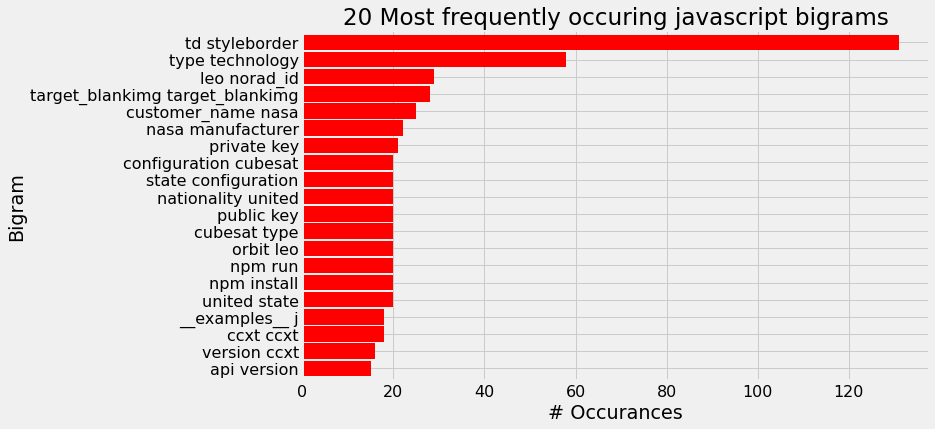

In [57]:
# what to run in function: 'all', all_words ; 'javascript', javascript_words ; 'python', python_words ; 'jupyter', jupyter_words ;	'C_plus', c_plus_words ; 'html', html_words
bigram = bigram_tool('javascript', javascript_words) # copy code from above and change the programming language
bigram = pd.DataFrame(bigram)
bigram.columns = ['count']
bigram.sort_values(by='count', ascending=False).head(20)

In [60]:
# function to create a bigram model
def bigram_tool(lang, lang_words):
    top_20_ham_bigrams = (pd.Series(nltk.ngrams(lang_words, 2))
                      .value_counts()
                      .head(20))
    top_20_ham_bigrams.sort_values().plot.barh(color= 'red' , width=.9, figsize=(10, 6))


    plt.rc('figure', figsize=(11, 5))
    plt.style.use('fivethirtyeight')
    plt.rc('font', size=16)

    plt.title('20 Most frequently occuring ' + lang + ' bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurances')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    
    return top_20_ham_bigrams

In [111]:
# function to creates a pi chart from bigram model
def turn_pi_chart(bigram, lang):
    # reset bigrams index
    bigram.reset_index(inplace=True)
    bigram.rename(columns={'index': 'bigram'}, inplace=True)
    bigram.set_index('bigram', inplace=True)
    # remove lables in the pie chart
    bigram.plot.pie(subplots=True, figsize=(8, 8), shadow=True)
    # move legend outside of the plot
    plt.legend()
    plt.legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
    # add a title
    plt.title(lang + ' bigrams')
    return plt.savefig('bigram_pie_chart.png')

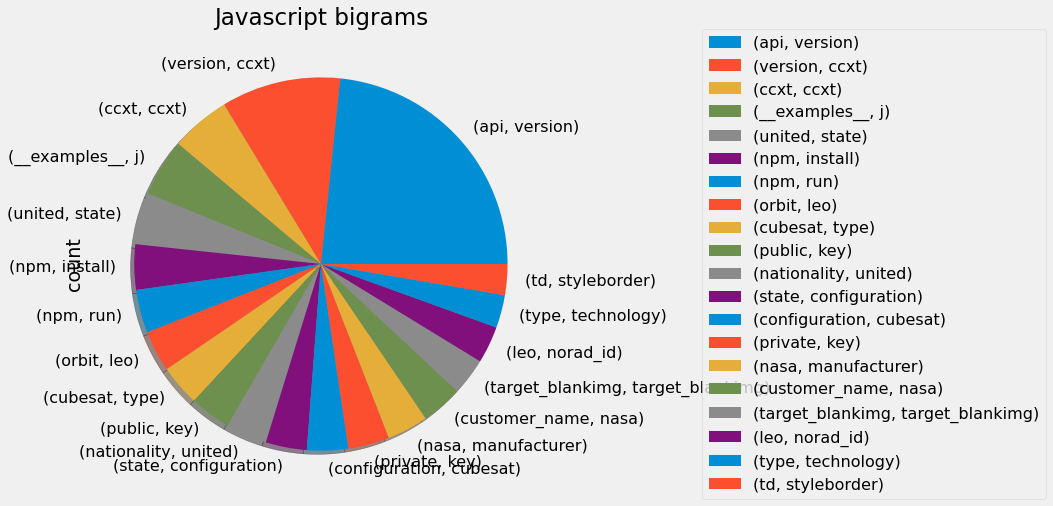

In [112]:
turn_pi_chart(bigram, 'Javascript')